# Summary

```Objective```

Test CX loss to see if it is working

```Methods```

todo

```Results```

todo

# Config

# Libs

In [1]:
from misalign.models.components.ctx_loss import ContextualLoss

from misalign.data.IXI_datamodule import IXIDataModule
from monai.visualize import matshow3d
from misalign.draw import blend_and_transpose
import matplotlib.pyplot as plt

import torch

# Analysis

path exists for /home/kanghyun/misalign-benchmark/data/IXI/train/prepared_data_0_0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/val/prepared_data_0.0_0.0.h5
path exists for /home/kanghyun/misalign-benchmark/data/IXI/test/prepared_data_0.0_0.0.h5


/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torch/_tensor.py:1295: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  ret = func(*args, **kwargs)
/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torch/_tensor.py:1295: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  ret = func(*args, **kwargs)
/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torch/_tensor.py:1295: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will

torch.Size([1, 1, 256, 256]) torch.Size([1, 1, 256, 256])


/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/monai/data/__init__.py:120: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t = cls([], dtype=storage.dtype, device=storage.device)


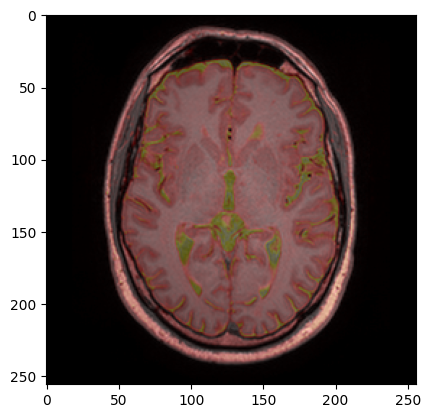

In [2]:
misalign_x = 0
misalign_y = 0

_ = IXIDataModule(
    "/home/kanghyun/misalign-benchmark/data/IXI",
    batch_size=1,
    misalign_x=misalign_x,
    misalign_y=misalign_y,
)
_.prepare_data()
_.setup()
train_data = _.train_dataloader()

for a, b in train_data:
    print(a.shape, b.shape)
    break

for _a, _b in zip(a, b):
    blended_img = blend_and_transpose(_a[0], _b[0])
    plt.imshow(blended_img)
    plt.show()
    break

In [ ]:
# Create aligned and misaligned image

al_a = _a[None].clone()
mis_a = _a[None].clone()
mis_a = torch.roll(mis_a, shifts=5, dims=-1)

blended_img = blend_and_transpose(al_a[0, 0], mis_a[0, 0])
plt.imshow(blended_img)
plt.show()

In [4]:
CTXLOSS = ContextualLoss(0.5)

/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kanghyun/miniconda3/envs/misalign/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
_a.requires_grad = True
out = CTXLOSS(_a[None], _b[None])

In [6]:
out.backward()

In [8]:
import torch


def random_subsampling(input_tensor, num_samples):
    N, C, H, W = input_tensor.shape
    total_pixels = H * W

    # Generate random indices
    rand_indices = torch.randint(0, total_pixels, (num_samples,))

    # Convert the indices to 2D coordinates
    x_indices = rand_indices % W
    y_indices = rand_indices // W

    # Sample the tensor
    sampled_tensor = input_tensor[:, :, y_indices, x_indices]

    return sampled_tensor

In [9]:
y_feat = getattr(CTXLOSS.vgg_model(_a[None].repeat(1, 3, 1, 1)), "conv_3_2")

y_sampled = random_subsampling(y_feat, 100)

print(y_sampled.shape)
test = y_sampled.mean()

test.backward()

torch.Size([1, 256, 100])
